## **Predicting the Quarterly Revenue for Amazon**


In [1]:
# Importing Packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import sklearn.preprocessing
from sklearn.metrics import r2_score
import keras

from keras.layers import Dense,Dropout,SimpleRNN,GRU, Bidirectional,LSTM
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Reading the Data
df=pd.read_excel('Amazon Quarterly Revenue.xlsx')
df.head()

,Date,Quarterly Revenue
0,2009-03-31,4889
1,2009-06-30,4651
2,2009-09-30,5449
3,2009-12-31,9520
4,2010-03-31,7131


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               55 non-null     datetime64[ns]
 1   Quarterly Revenue  55 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1008.0 bytes


In [4]:
# Setting Date as Index
df = df.set_index('Date')
df.head()

,Quarterly Revenue
Date,
2009-03-31,4889
2009-06-30,4651
2009-09-30,5449
2009-12-31,9520
2010-03-31,7131


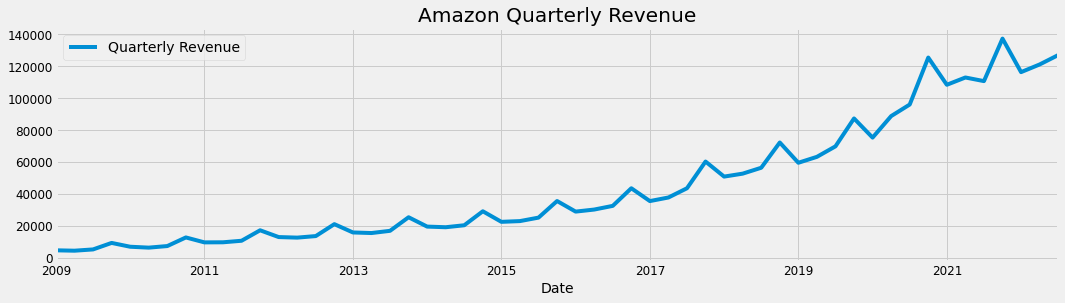

In [5]:
# Plotting the data
df.plot(figsize=(16,4),legend=True)
plt.title('Amazon Quarterly Revenue')
plt.show()

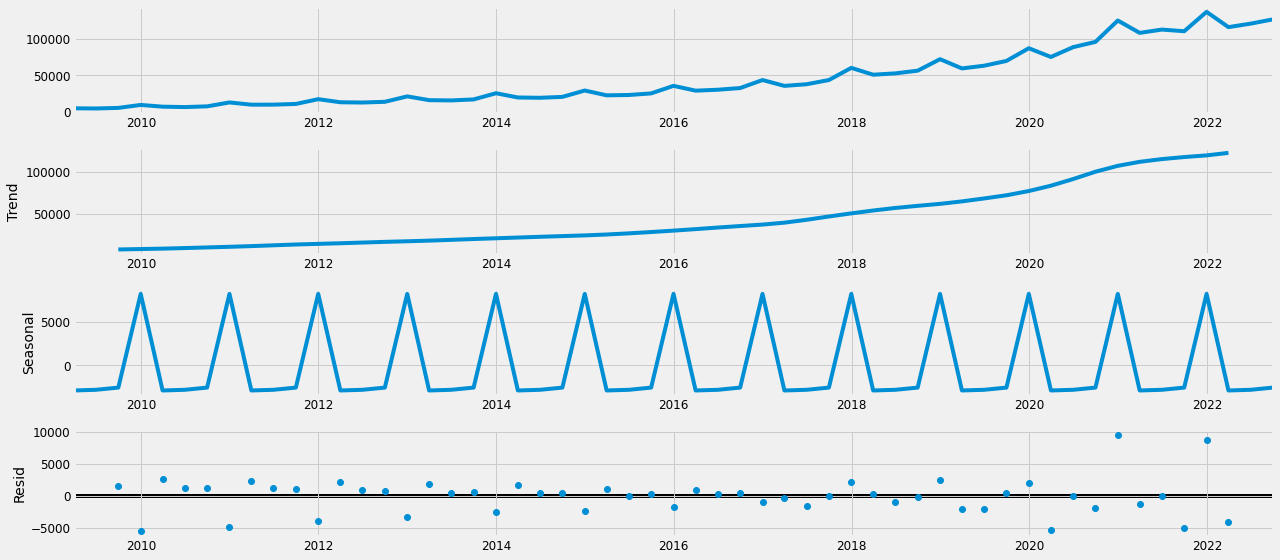

In [6]:
# Decomposition the data 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.show()

C:\Users\ravit\AppData\Local\Temp\ipykernel_23444\1521455262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Quarterly Revenue']
C:\Users\ravit\AppData\Local\Temp\ipykernel_23444\1521455262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Quarterly Revenue']


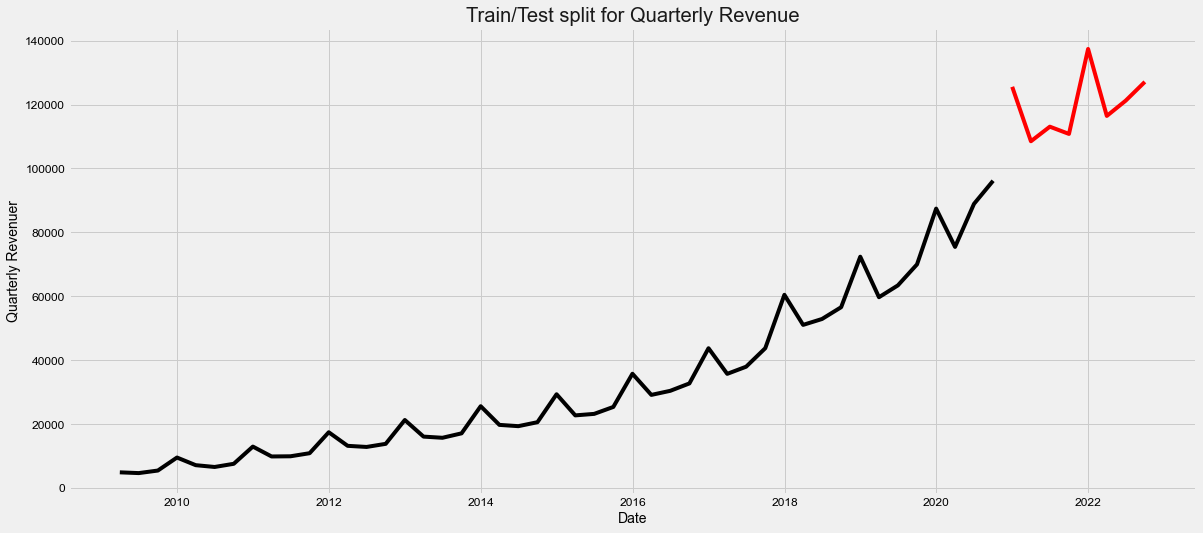

In [7]:
# Dividing the data into training and testing
# Ploting the data
import seaborn as sns 
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2020-12", format='%Y-%m')]
train['train'] = train['Quarterly Revenue']
del train['Date']
del train['Quarterly Revenue']
test = df[df['Date'] >= pd.to_datetime("2020-12", format='%Y-%m')]
del test['Date']
test['test'] = test['Quarterly Revenue']
del test['Quarterly Revenue']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Quarterly Revenue")
plt.ylabel("Quarterly Revenuer")
plt.xlabel('Date')
sns.set()
plt.show()

## **Arima Model**

In [8]:
# Applying ARIMA Model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=971.654, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=952.220, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=949.387, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=924.973, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 1.042 seconds


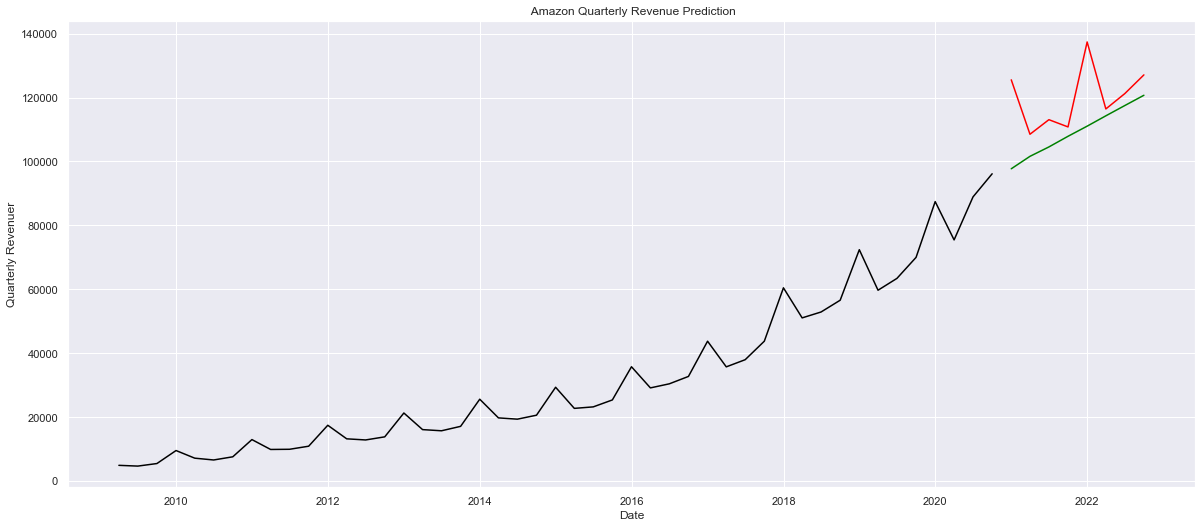

In [9]:
# Plotting the prediction
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title(" Amazon Quarterly Revenue Prediction")
plt.ylabel("Quarterly Revenuer")
plt.xlabel('Date')
sns.set()
plt.show()

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  14397.60532056588


## **SARIMA Model**

In [11]:
df=pd.read_excel('Amazon Quarterly Revenue.xlsx')
df = df.set_index('Date')


In [12]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1367.2792850832486


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1384.7826806418425
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1022.33307174621
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1937.9081703162733


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1319.6133273469204


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:954.8639372161952
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1338.0347914734116
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1336.2895342131167
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:997.6716273850074


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2060.309524077191
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1335.1281159172925
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1347.238813359721


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:989.9345810970475


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:991.7424301654125
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1143.0125044975557
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1153.9089023156198
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:830.278212770177


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1814.9274649047793
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1089.700826070246
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1079.4426633015596
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:801.3516844305152


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:813.0323659024167
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1138.017354867222
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1122.6176719879447
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:828.9177076728365


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1766.8276901090894
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1086.5359061826894


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1075.1611975876497


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1170.4482042157147


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1141.3587493292719
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:854.504861743741


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1769.226673954814


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:68.66289669339993


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1109.5438864402975
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:826.5078269851172


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:828.2521899424813
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1166.0380174496697
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1145.4472375316252


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:851.8186407802569


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1901.4553563362092


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1114.9536523362701


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1104.1062509553135
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:826.6061118973649


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:828.0616232978892
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1137.253626266231
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1120.1080560939781
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:826.3449089619811


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2061.631253859447
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1083.741927368625


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1071.479212725622


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:804.1482937131436
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1139.285488043769


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1096.5670907245149
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:814.9999643224419


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2105.193064335788
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1087.361139322312


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1083.3394806919655
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:793.7653669439122


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:806.413434600573


In [14]:
#Fitting the SARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9427      0.140     -6.720      0.000      -1.218      -0.668
ma.L1          0.7850      0.263      2.983      0.003       0.269       1.301
ar.S.L12       0.8606      0.142      6.053      0.000       0.582       1.139
sigma2       7.27e+06   9.43e-09   7.71e+14      0.000    7.27e+06    7.27e+06


In [16]:
prediction = result.get_prediction(start = pd.to_datetime('2021-03-31'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Quarterly Revenue,upper Quarterly Revenue
2021-03-31,105815.138599,116384.229973
2021-06-30,109152.276180,119721.367405
2021-09-30,110279.879532,120848.970664
2021-12-31,129114.345905,139683.436980
2022-03-31,110812.233037,121381.324076
2022-06-30,120115.384149,130684.475167
2022-09-30,123874.142821,134443.233826


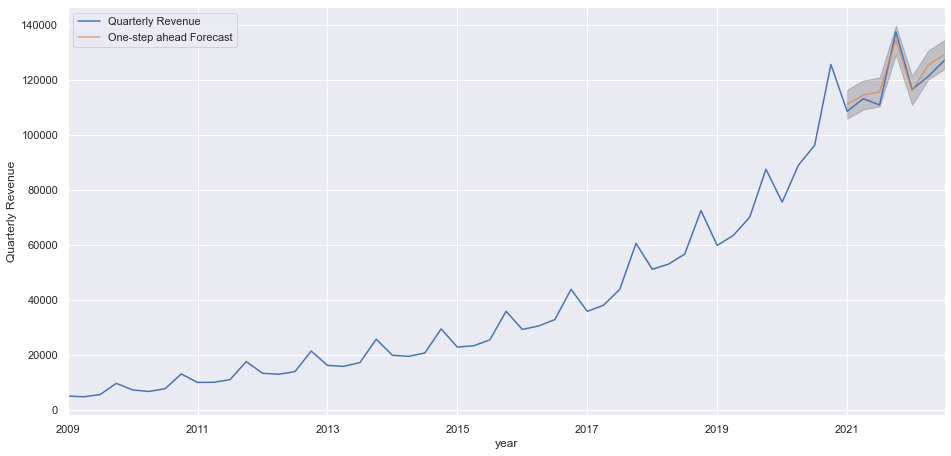

In [17]:
#Visualize the forecasting
ax = df['2009':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("year")
ax.set_ylabel('Quarterly Revenue')
plt.legend()
plt.show()

In [23]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error

y_hat = prediction.predicted_mean
y_truth = df['2021-03-31':]
mse = mean_squared_error(y_truth,y_hat)
rmse = np.sqrt(mse)

print('The Mean Squared Error of our forecasts is', mse)
print('The Root Mean Squared Error of our forecasts is', rmse)

The Mean Squared Error of our forecasts is 8840005.78536543
The Root Mean Squared Error of our forecasts is 2973.214722378024


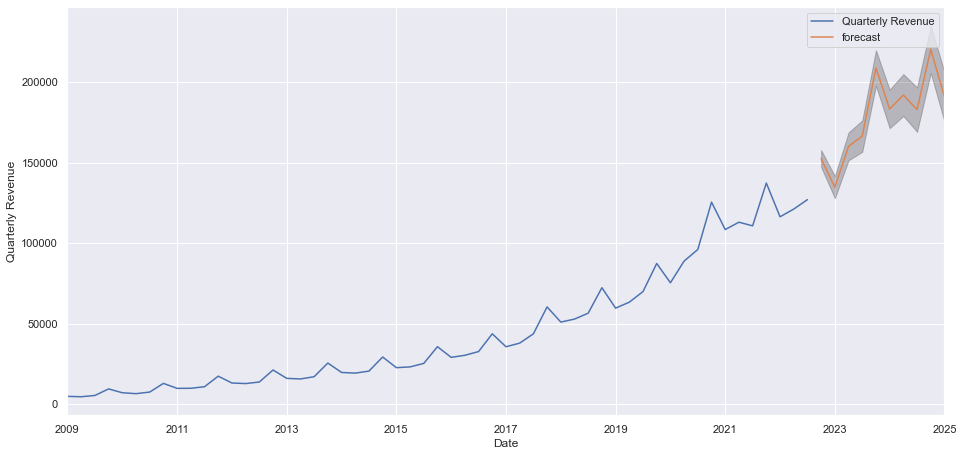

In [24]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly Revenue')

plt.legend()
plt.show()


## **DNN MODEL**

In [25]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X).astype('int'), np.array(Y).astype('int')

In [26]:
df=pd.read_excel('Amazon Quarterly Revenue.xlsx')

df = df.set_index('Date')


In [27]:
df1 = df
#Split data set into testing dataset and train dataset
train_size = 49
train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]
# setup look_back window 
look_back = 4
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [29]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=500, batch_size=4, verbose=1, validation_data=(testX,testY),shuffle=False)

Epoch 1/500
12/12 [==============================] - 2s 22ms/step - loss: 1201522048.0000 - mse: 1201522048.0000 - mae: 27822.0586 - val_loss: 5053336064.0000 - val_mse: 5053336064.0000 - val_mae: 70970.8594
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 831125184.0000 - mse: 831125184.0000 - mae: 22757.4551 - val_loss: 2913479680.0000 - val_mse: 2913479680.0000 - val_mae: 53744.7383
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 542273984.0000 - mse: 542273984.0000 - mae: 18141.4531 - val_loss: 1351266816.0000 - val_mse: 1351266816.0000 - val_mae: 36260.3984
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 321139008.0000 - mse: 321139008.0000 - mae: 13588.3086 - val_loss: 407396864.0000 - val_mse: 407396864.0000 - val_mae: 19005.3984
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 165593744.0000 - mse: 165593744.0000 - mae: 9163.9678 - val_loss: 68919288.0000 - val_mse: 68919288.0000 -

Epoch 42/500
12/12 [==============================] - 0s 3ms/step - loss: 22970766.0000 - mse: 22970766.0000 - mae: 3483.7358 - val_loss: 589407040.0000 - val_mse: 589407040.0000 - val_mae: 23254.3906
Epoch 43/500
12/12 [==============================] - 0s 3ms/step - loss: 22753538.0000 - mse: 22753538.0000 - mae: 3465.2966 - val_loss: 588910400.0000 - val_mse: 588910400.0000 - val_mae: 23231.2891
Epoch 44/500
12/12 [==============================] - 0s 3ms/step - loss: 22510216.0000 - mse: 22510216.0000 - mae: 3435.1052 - val_loss: 575467328.0000 - val_mse: 575467328.0000 - val_mae: 22980.7031
Epoch 45/500
12/12 [==============================] - 0s 3ms/step - loss: 22244080.0000 - mse: 22244080.0000 - mae: 3408.6152 - val_loss: 573951104.0000 - val_mse: 573951104.0000 - val_mae: 22959.3906
Epoch 46/500
12/12 [==============================] - 0s 3ms/step - loss: 22011124.0000 - mse: 22011124.0000 - mae: 3384.3669 - val_loss: 569402240.0000 - val_mse: 569402240.0000 - val_mae: 22864.

Epoch 83/500
12/12 [==============================] - 0s 3ms/step - loss: 15685739.0000 - mse: 15685739.0000 - mae: 2647.0491 - val_loss: 467578496.0000 - val_mse: 467578496.0000 - val_mae: 20770.2969
Epoch 84/500
12/12 [==============================] - 0s 3ms/step - loss: 15571621.0000 - mse: 15571621.0000 - mae: 2632.9775 - val_loss: 462997344.0000 - val_mse: 462997344.0000 - val_mae: 20666.1016
Epoch 85/500
12/12 [==============================] - 0s 3ms/step - loss: 15452501.0000 - mse: 15452501.0000 - mae: 2616.5002 - val_loss: 462474976.0000 - val_mse: 462474976.0000 - val_mae: 20660.7734
Epoch 86/500
12/12 [==============================] - 0s 3ms/step - loss: 15341505.0000 - mse: 15341505.0000 - mae: 2601.7717 - val_loss: 460397088.0000 - val_mse: 460397088.0000 - val_mae: 20613.7812
Epoch 87/500
12/12 [==============================] - 0s 3ms/step - loss: 15222606.0000 - mse: 15222606.0000 - mae: 2590.2947 - val_loss: 460821376.0000 - val_mse: 460821376.0000 - val_mae: 20609.

Epoch 124/500
12/12 [==============================] - 0s 4ms/step - loss: 12000090.0000 - mse: 12000090.0000 - mae: 2327.5146 - val_loss: 462790912.0000 - val_mse: 462790912.0000 - val_mae: 20387.2344
Epoch 125/500
12/12 [==============================] - 0s 4ms/step - loss: 11928244.0000 - mse: 11928244.0000 - mae: 2327.9114 - val_loss: 462695776.0000 - val_mse: 462695776.0000 - val_mae: 20382.1875
Epoch 126/500
12/12 [==============================] - 0s 4ms/step - loss: 11952259.0000 - mse: 11952259.0000 - mae: 2307.5381 - val_loss: 446987360.0000 - val_mse: 446987360.0000 - val_mae: 20099.1484
Epoch 127/500
12/12 [==============================] - 0s 4ms/step - loss: 11879910.0000 - mse: 11879910.0000 - mae: 2318.1877 - val_loss: 464706880.0000 - val_mse: 464706880.0000 - val_mae: 20499.2578
Epoch 128/500
12/12 [==============================] - 0s 4ms/step - loss: 11747802.0000 - mse: 11747802.0000 - mae: 2307.7197 - val_loss: 461131584.0000 - val_mse: 461131584.0000 - val_mae: 2

12/12 [==============================] - 0s 3ms/step - loss: 10433561.0000 - mse: 10433561.0000 - mae: 2161.2021 - val_loss: 407344000.0000 - val_mse: 407344000.0000 - val_mae: 19320.6797
Epoch 165/500
12/12 [==============================] - 0s 3ms/step - loss: 10538281.0000 - mse: 10538281.0000 - mae: 2181.5352 - val_loss: 426915040.0000 - val_mse: 426915040.0000 - val_mae: 19750.1953
Epoch 166/500
12/12 [==============================] - 0s 3ms/step - loss: 10419394.0000 - mse: 10419394.0000 - mae: 2163.6313 - val_loss: 402897472.0000 - val_mse: 402897472.0000 - val_mae: 19211.5234
Epoch 167/500
12/12 [==============================] - 0s 3ms/step - loss: 10430099.0000 - mse: 10430099.0000 - mae: 2165.8782 - val_loss: 408145696.0000 - val_mse: 408145696.0000 - val_mae: 19387.1562
Epoch 168/500
12/12 [==============================] - 0s 3ms/step - loss: 10447793.0000 - mse: 10447793.0000 - mae: 2176.5176 - val_loss: 417086848.0000 - val_mse: 417086848.0000 - val_mae: 19550.1094
Epoc

Epoch 205/500
12/12 [==============================] - 0s 3ms/step - loss: 10131002.0000 - mse: 10131002.0000 - mae: 2161.3704 - val_loss: 413270560.0000 - val_mse: 413270560.0000 - val_mae: 19467.6719
Epoch 206/500
12/12 [==============================] - 0s 3ms/step - loss: 10041306.0000 - mse: 10041306.0000 - mae: 2143.7266 - val_loss: 398159872.0000 - val_mse: 398159872.0000 - val_mae: 19105.2891
Epoch 207/500
12/12 [==============================] - 0s 3ms/step - loss: 10047595.0000 - mse: 10047595.0000 - mae: 2148.0020 - val_loss: 397358208.0000 - val_mse: 397358208.0000 - val_mae: 19142.0547
Epoch 208/500
12/12 [==============================] - 0s 3ms/step - loss: 10031296.0000 - mse: 10031296.0000 - mae: 2145.0508 - val_loss: 387217728.0000 - val_mse: 387217728.0000 - val_mae: 18935.9844
Epoch 209/500
12/12 [==============================] - 0s 3ms/step - loss: 10056757.0000 - mse: 10056757.0000 - mae: 2141.6653 - val_loss: 390167872.0000 - val_mse: 390167872.0000 - val_mae: 1

Epoch 246/500
12/12 [==============================] - 0s 3ms/step - loss: 9914216.0000 - mse: 9914216.0000 - mae: 2142.3164 - val_loss: 386616128.0000 - val_mse: 386616128.0000 - val_mae: 18931.4297
Epoch 247/500
12/12 [==============================] - 0s 3ms/step - loss: 9805458.0000 - mse: 9805458.0000 - mae: 2114.7822 - val_loss: 370719648.0000 - val_mse: 370719648.0000 - val_mae: 18536.5703
Epoch 248/500
12/12 [==============================] - 0s 3ms/step - loss: 9915012.0000 - mse: 9915012.0000 - mae: 2138.5898 - val_loss: 379641600.0000 - val_mse: 379641600.0000 - val_mae: 18793.5703
Epoch 249/500
12/12 [==============================] - 0s 3ms/step - loss: 9802335.0000 - mse: 9802335.0000 - mae: 2111.9587 - val_loss: 374659744.0000 - val_mse: 374659744.0000 - val_mae: 18610.4688
Epoch 250/500
12/12 [==============================] - 0s 3ms/step - loss: 9930680.0000 - mse: 9930680.0000 - mae: 2140.1919 - val_loss: 404226624.0000 - val_mse: 404226624.0000 - val_mae: 19213.0469


Epoch 287/500
12/12 [==============================] - 0s 3ms/step - loss: 9658032.0000 - mse: 9658032.0000 - mae: 2079.2874 - val_loss: 374653248.0000 - val_mse: 374653248.0000 - val_mae: 18420.0703
Epoch 288/500
12/12 [==============================] - 0s 3ms/step - loss: 10124886.0000 - mse: 10124886.0000 - mae: 2177.7314 - val_loss: 408948672.0000 - val_mse: 408948672.0000 - val_mae: 19394.6016
Epoch 289/500
12/12 [==============================] - 0s 3ms/step - loss: 9569368.0000 - mse: 9569368.0000 - mae: 2067.1350 - val_loss: 356447936.0000 - val_mse: 356447936.0000 - val_mae: 18078.1797
Epoch 290/500
12/12 [==============================] - 0s 4ms/step - loss: 10113670.0000 - mse: 10113670.0000 - mae: 2171.8220 - val_loss: 394118944.0000 - val_mse: 394118944.0000 - val_mae: 19130.9219
Epoch 291/500
12/12 [==============================] - 0s 4ms/step - loss: 9570631.0000 - mse: 9570631.0000 - mae: 2057.2974 - val_loss: 341102848.0000 - val_mse: 341102848.0000 - val_mae: 17736.3

Epoch 328/500
12/12 [==============================] - 0s 3ms/step - loss: 9916796.0000 - mse: 9916796.0000 - mae: 2159.6877 - val_loss: 402784544.0000 - val_mse: 402784544.0000 - val_mae: 19303.1250
Epoch 329/500
12/12 [==============================] - 0s 3ms/step - loss: 9137785.0000 - mse: 9137785.0000 - mae: 2014.5198 - val_loss: 334223904.0000 - val_mse: 334223904.0000 - val_mae: 17524.8047
Epoch 330/500
12/12 [==============================] - 0s 3ms/step - loss: 9852043.0000 - mse: 9852043.0000 - mae: 2153.9788 - val_loss: 390258112.0000 - val_mse: 390258112.0000 - val_mae: 19084.4375
Epoch 331/500
12/12 [==============================] - 0s 3ms/step - loss: 9066542.0000 - mse: 9066542.0000 - mae: 2017.0350 - val_loss: 324982240.0000 - val_mse: 324982240.0000 - val_mae: 17339.3438
Epoch 332/500
12/12 [==============================] - 0s 3ms/step - loss: 9703297.0000 - mse: 9703297.0000 - mae: 2135.6458 - val_loss: 375868928.0000 - val_mse: 375868928.0000 - val_mae: 18750.4844


Epoch 369/500
12/12 [==============================] - 0s 3ms/step - loss: 9186143.0000 - mse: 9186143.0000 - mae: 1984.3210 - val_loss: 296102400.0000 - val_mse: 296102400.0000 - val_mae: 16491.0234
Epoch 370/500
12/12 [==============================] - 0s 4ms/step - loss: 10491438.0000 - mse: 10491438.0000 - mae: 2180.8987 - val_loss: 382510976.0000 - val_mse: 382510976.0000 - val_mae: 18917.3906
Epoch 371/500
12/12 [==============================] - 0s 3ms/step - loss: 9243822.0000 - mse: 9243822.0000 - mae: 1987.4531 - val_loss: 284552896.0000 - val_mse: 284552896.0000 - val_mae: 16155.6562
Epoch 372/500
12/12 [==============================] - 0s 3ms/step - loss: 10407425.0000 - mse: 10407425.0000 - mae: 2167.8679 - val_loss: 375794176.0000 - val_mse: 375794176.0000 - val_mae: 18746.6641
Epoch 373/500
12/12 [==============================] - 0s 4ms/step - loss: 9277429.0000 - mse: 9277429.0000 - mae: 1989.2299 - val_loss: 290913888.0000 - val_mse: 290913888.0000 - val_mae: 16347.7

Epoch 410/500
12/12 [==============================] - 0s 3ms/step - loss: 10043337.0000 - mse: 10043337.0000 - mae: 2153.2427 - val_loss: 370874080.0000 - val_mse: 370874080.0000 - val_mae: 18622.1562
Epoch 411/500
12/12 [==============================] - 0s 3ms/step - loss: 8885183.0000 - mse: 8885183.0000 - mae: 1970.5242 - val_loss: 285457152.0000 - val_mse: 285457152.0000 - val_mae: 16198.5234
Epoch 412/500
12/12 [==============================] - 0s 4ms/step - loss: 9811538.0000 - mse: 9811538.0000 - mae: 2121.2158 - val_loss: 355728832.0000 - val_mse: 355728832.0000 - val_mae: 18209.5000
Epoch 413/500
12/12 [==============================] - 0s 4ms/step - loss: 8898586.0000 - mse: 8898586.0000 - mae: 1966.8771 - val_loss: 287152832.0000 - val_mse: 287152832.0000 - val_mae: 16235.4219
Epoch 414/500
12/12 [==============================] - 0s 3ms/step - loss: 9938379.0000 - mse: 9938379.0000 - mae: 2145.3062 - val_loss: 367029632.0000 - val_mse: 367029632.0000 - val_mae: 18517.531

Epoch 451/500
12/12 [==============================] - 0s 3ms/step - loss: 8947892.0000 - mse: 8947892.0000 - mae: 2007.5140 - val_loss: 299591520.0000 - val_mse: 299591520.0000 - val_mae: 16288.4922
Epoch 452/500
12/12 [==============================] - 0s 3ms/step - loss: 10455611.0000 - mse: 10455611.0000 - mae: 2180.7383 - val_loss: 391045440.0000 - val_mse: 391045440.0000 - val_mae: 18960.3281
Epoch 453/500
12/12 [==============================] - 0s 3ms/step - loss: 8892596.0000 - mse: 8892596.0000 - mae: 1980.7925 - val_loss: 279059328.0000 - val_mse: 279059328.0000 - val_mae: 15879.0781
Epoch 454/500
12/12 [==============================] - 0s 3ms/step - loss: 10190342.0000 - mse: 10190342.0000 - mae: 2139.8481 - val_loss: 364931328.0000 - val_mse: 364931328.0000 - val_mae: 18401.9062
Epoch 455/500
12/12 [==============================] - 0s 3ms/step - loss: 8950093.0000 - mse: 8950093.0000 - mae: 1978.8868 - val_loss: 273669120.0000 - val_mse: 273669120.0000 - val_mae: 15795.2

Epoch 492/500
12/12 [==============================] - 0s 3ms/step - loss: 9770684.0000 - mse: 9770684.0000 - mae: 2101.0576 - val_loss: 345129728.0000 - val_mse: 345129728.0000 - val_mae: 17901.1484
Epoch 493/500
12/12 [==============================] - 0s 4ms/step - loss: 8639922.0000 - mse: 8639922.0000 - mae: 1958.3080 - val_loss: 270535712.0000 - val_mse: 270535712.0000 - val_mae: 15700.5547
Epoch 494/500
12/12 [==============================] - 0s 4ms/step - loss: 9953087.0000 - mse: 9953087.0000 - mae: 2139.1475 - val_loss: 360974400.0000 - val_mse: 360974400.0000 - val_mae: 18330.4922
Epoch 495/500
12/12 [==============================] - 0s 4ms/step - loss: 8583583.0000 - mse: 8583583.0000 - mae: 1949.5579 - val_loss: 268220416.0000 - val_mse: 268220416.0000 - val_mae: 15644.8203
Epoch 496/500
12/12 [==============================] - 0s 4ms/step - loss: 9724727.0000 - mse: 9724727.0000 - mae: 2106.7341 - val_loss: 344376256.0000 - val_mse: 344376256.0000 - val_mae: 17900.2656


In [30]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [31]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print(train_score)
print(test_score)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))

Train Root Mean Squared Error(RMSE): 2863.85; Train Mean Absolute Error(MAE) : 1954.37 
[8201623.0, 8201623.0, 1954.36669921875]
[355905248.0, 355905248.0, 18217.0234375]
Test Root Mean Squared Error(RMSE): 18865.45; Test Mean Absolute Error(MAE) : 18217.02 


In [32]:
 def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:8], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:8], 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Ads Daily Spend', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show();

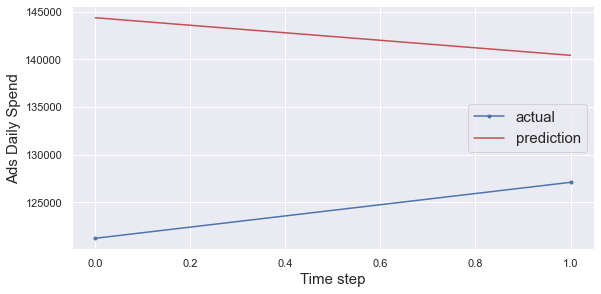

In [33]:
test_predict = model.predict(testX)
prediction_plot(testY, test_predict)

## **GRU and BiLSTM Models** 

In [34]:
df=pd.read_excel('Amazon Quarterly Revenue.xlsx')
df.head()

,Date,Quarterly Revenue
0,2009-03-31,4889
1,2009-06-30,4651
2,2009-09-30,5449
3,2009-12-31,9520
4,2010-03-31,7131


In [35]:
df = df.set_index('Date')
df.head()

,Quarterly Revenue
Date,
2009-03-31,4889
2009-06-30,4651
2009-09-30,5449
2009-12-31,9520
2010-03-31,7131


In [36]:
# Split train data and test data
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [37]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [38]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 4
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (40, 4, 1)
y_train.shape:  (40, 1)
X_test.shape:  (7, 4, 1)
y_test.shape:  (7, 1)


In [39]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [40]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
2/2 [==============================] - 4s 639ms/step - loss: 0.0568 - val_loss: 0.3605
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0325 - val_loss: 0.2366
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0159 - val_loss: 0.1404
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0121 - val_loss: 0.0744
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0106 - val_loss: 0.0389
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0139 - val_loss: 0.0255
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0141 - val_loss: 0.0244
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0132 - val_loss: 0.0302
Epoch 9/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0105 - val_loss: 0.0395
Epoch 10/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0111 - val_loss: 0.0490
Epoch 11/100
2/2 [

In [41]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 0.0588 - val_loss: 0.3944
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0404 - val_loss: 0.2915
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0255 - val_loss: 0.1979
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0144 - val_loss: 0.1182
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0083 - val_loss: 0.0592
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0076 - val_loss: 0.0257
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0104 - val_loss: 0.0135
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0121 - val_loss: 0.0117
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0109 - val_loss: 0.0150
Epoch 10/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0083 - val_loss: 0.0223
Epoch 11/100
2/2 [===

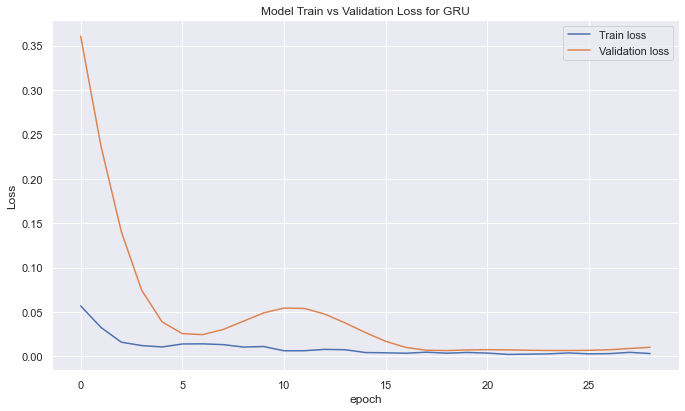

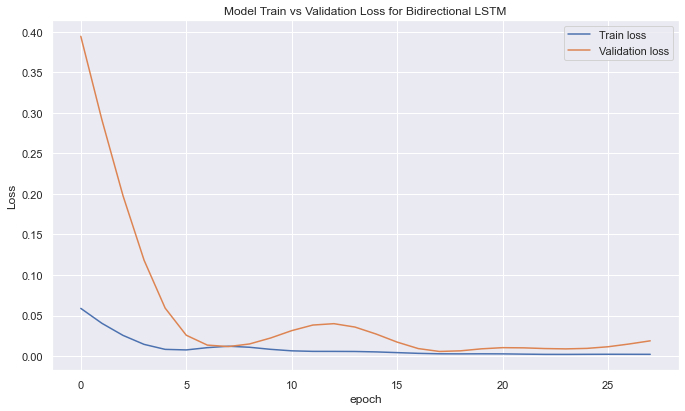

In [42]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

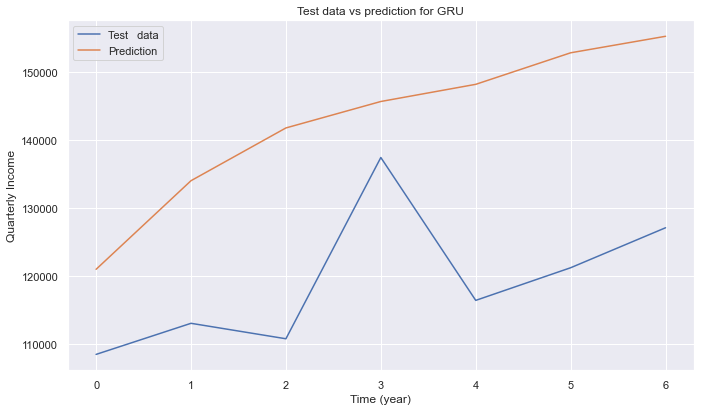

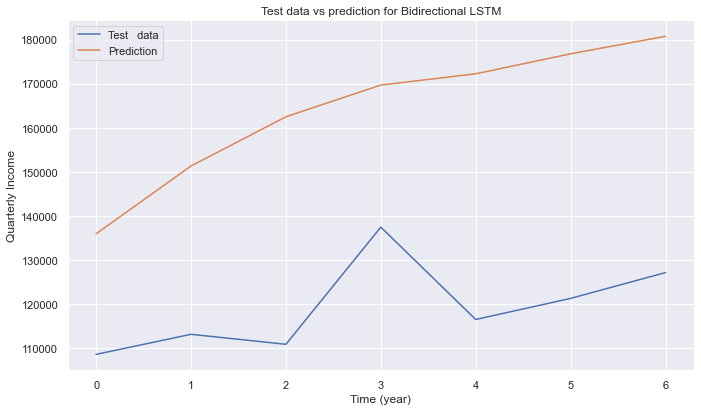

In [43]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(scaler.inverse_transform(y_test)), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (year)')
    plt.ylabel('Quarterly Income')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [44]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, scaler.inverse_transform(y_test), 'GRU')
evaluate_prediction(prediction_bilstm, scaler.inverse_transform(y_test), 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 23415.6786
Root Mean Square Error: 25093.8335

Bidirectional LSTM:
Mean Absolute Error: 44927.9888
Root Mean Square Error: 46282.9922



In [45]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(scaler.transform(prediction_gru), y_test, 'GRU')
evaluate_prediction(scaler.transform(prediction_bilstm), y_test, 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 0.2828
Root Mean Square Error: 0.3031

Bidirectional LSTM:
Mean Absolute Error: 0.5427
Root Mean Square Error: 0.5591



R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
